# Hypothesis testing

1. ### Assume a null hypothesis
2. ### Calculate appropriate test statistic
3. ### Use test statistic pdf to calculate a p-value (one-sided or two-sided? )
4. ### Is the p-value sufficiently low that you reject your null hypothesis?

---
# Modeling assumptions

1. ### Linear predictors 
2. ### The errors are independent 
3. ### The errors are normally distributed
4. ### Equal variance of errors

---
# Independently and identically distributed

- ### Abbreviated IID or iid
- ### Random variable is drawn from the same distribution
- ### Draws are independent 


### $e \sim N(0, \sigma^{2}_{e})$

###  $\begin{bmatrix} e_{1} \\ e_{2} \\ e_{3} \end{bmatrix} = \begin{bmatrix}\sigma^{2}_{e} & 0  & 0\\ 0 & \sigma^{2}_{e} & 0\\0 & 0  & \sigma^{2}_{e}\\\end{bmatrix}$  


---
# The Iris data set


- ### Morphological characteristics from three iris species
- ### Introduced by Ronald Fischer 
 + ### Father of modern statistics (Randomization, replication, ANOVA, p-value threshold)
 + ### Many seminal contributions to quantitative genetics 



![](images/iris.jpg)


---
# Exploratory Analysis

1. ### Understand how your data was generated 
2. ### Talk to the people who generated the data
3. ### Visualize, Visualize, Visualize

---
# Normality of residuals

- ### We assume residuals are normally distributed



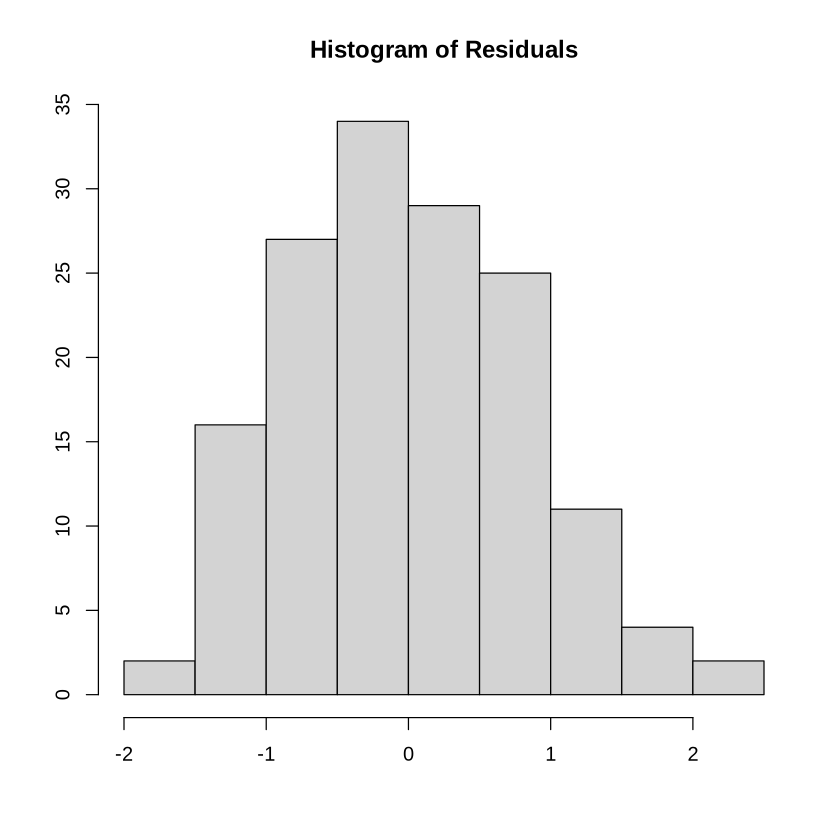

In [1]:
fit <- lm(Sepal.Length ~ Sepal.Width, data=iris)
hist(resid(fit), xlab="", ylab="", main="Histogram of Residuals")



---
# Homoscedasticity

- ### Equal variance assumption



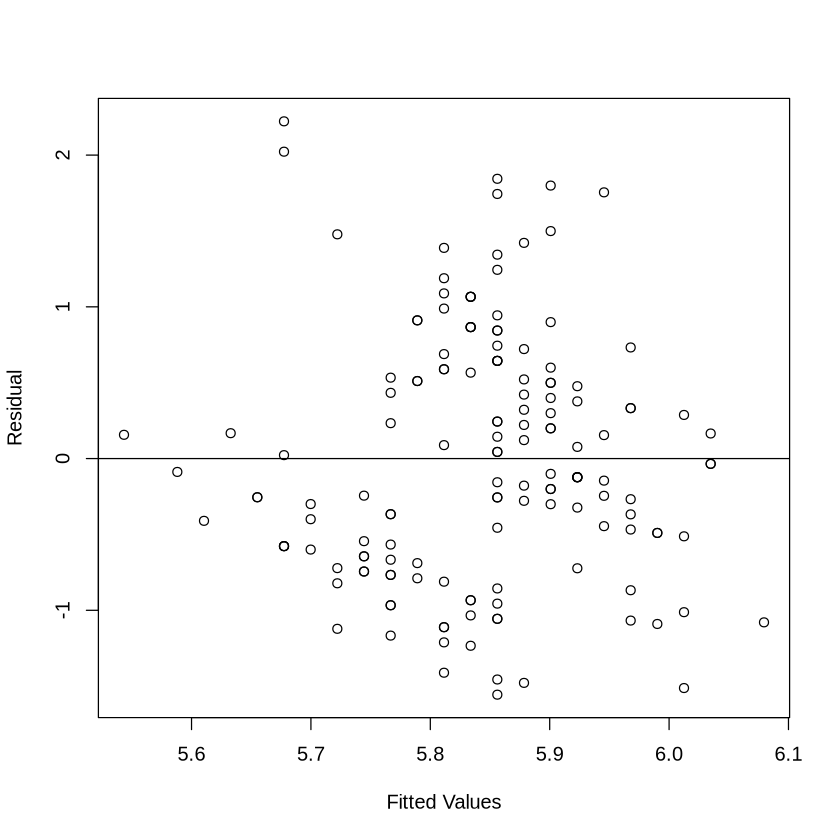

In [2]:
plot(fitted(fit), resid(fit),  xlab='Fitted Values', ylab="Residual")
abline(0,0)



---
# Looking for outliers

- ### Abnormal observations that may distort overall trends
- ### Outliers can be detected using many different methods
 + ### Large residual
 + ### Leverage $\hat{y} = \mathbf{H}y$ 
- ### Best practice to fit with and without outlier


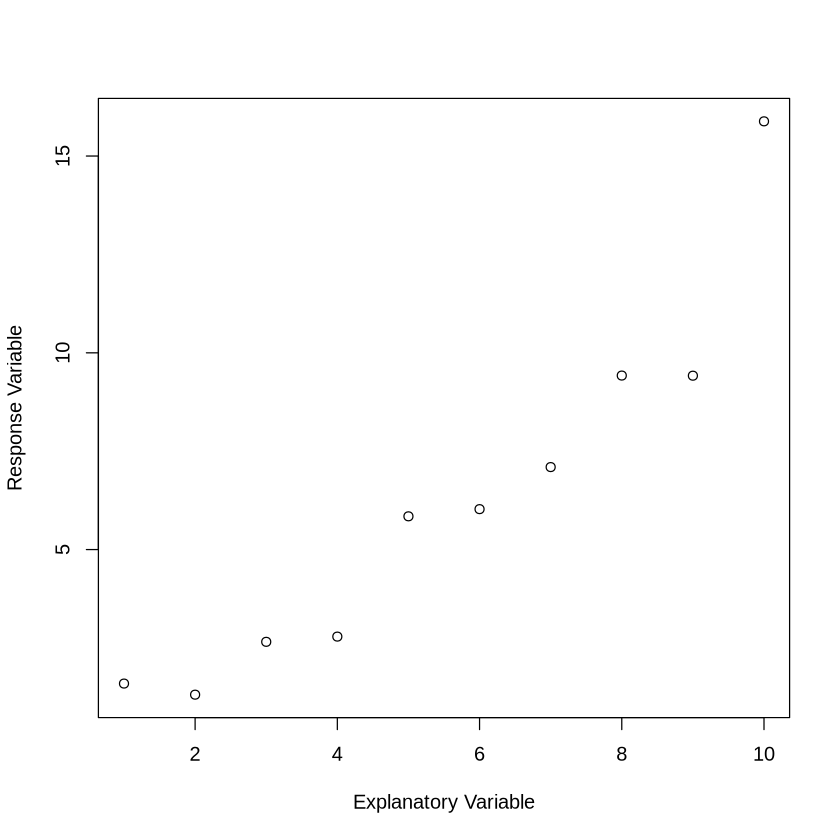

In [3]:
x=c(1:10)
y=x+rnorm(10,0,1)
y[10]=y[10]+5
plot(x, y, xlab="Explanatory Variable", ylab="Response Variable")

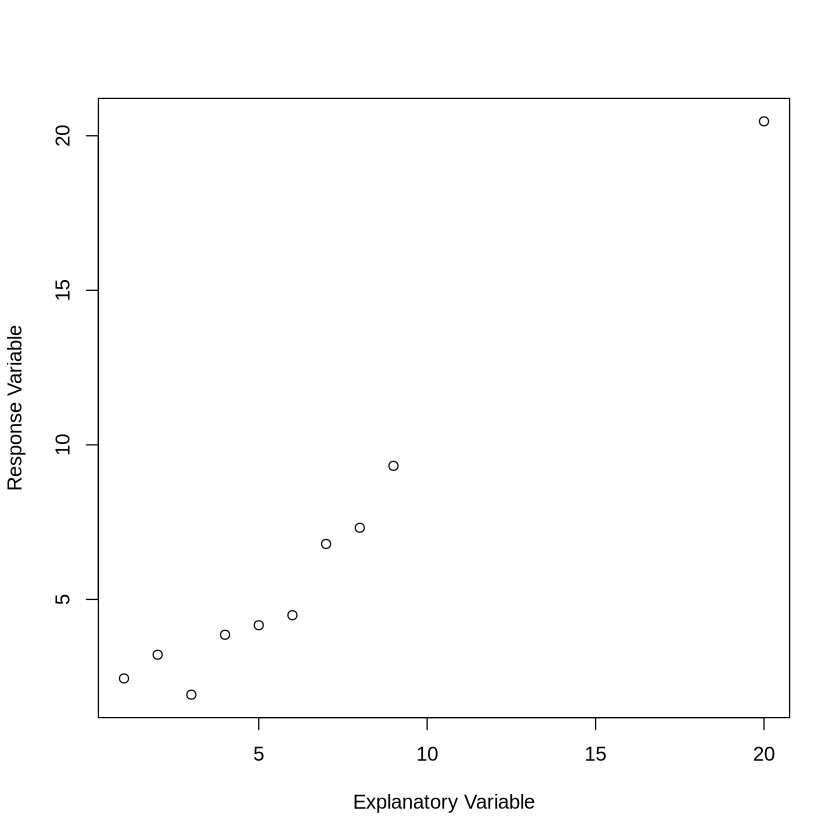

In [4]:
x=c(1:9,20)
y=x+rnorm(10,0,1)
plot(x, y, xlab="Explanatory Variable", ylab="Response Variable")




---
# Multicollinearity 

- ### Correlated predictors
- ### Leads to erratic coefficient estimates

# Here we look at simple example of multicollinearity between a location effect and a treatment effect.

## First lets look at a "balanced" experimental design

|       |  Trt1   | Trt2   |
|-------|---------|--------|
|Loc 1  |    5    |   5    |
|Loc 2  |    5    |   5    |



In [5]:
### #beta_true(loc1,loc2, trt1, trt2)
beta_true=c(20,30,-10,10)
residuals = rnorm(20,0,1)
#generating y values based on the balanced design
y=rep(0,20)
y[1:5]=beta_true[1]+beta_true[3]+residuals[1:5]
y[6:10]=beta_true[1]+beta_true[4]+residuals[6:10]
y[11:15]=beta_true[2]+beta_true[3]+residuals[11:15]
y[16:20]=beta_true[2]+beta_true[4]+residuals[16:20]
#setting up the design matrix
X=matrix(0,20,3)
X[,1]=1
X[11:20,2]=1
X[6:10,3]=1
X[16:20,3]=1
#solving for beta
b=solve(t(X)%*%X)%*%t(X)%*%y
#now let's get the (co)variance of all of the estimates 
var_e=t(y-X%*%b)%*%(y-X%*%b)/(20-3)
covb=solve(t(X)%*%X)*var_e[1,1]
covb
print("trt2-trt1")
b[3]



0.2248244,-0.1498829,-0.1498829
-0.1498829,0.2997658,0.0000000
-0.1498829,0.0000000,0.2997658


[1] "trt2-trt1"


[1] 19.45803

___
## Now lets look at an extremely unbalanced experimental design

|       |  Trt1   | Trt2   |
|-------|---------|--------|
|Loc 1  |    8    |   2    |
|Loc 2  |    2    |   8    |

In [6]:

#generating y values based on the balanced design
y2=rep(0,20)
y2[1:8]=beta_true[1]+beta_true[3]+residuals[1:8]
y2[9:10]=beta_true[1]+beta_true[4]+residuals[9:10]
y2[11:12]=beta_true[2]+beta_true[3]+residuals[11:12]
y2[13:20]=beta_true[2]+beta_true[4]+residuals[13:20]
#setting up the design matrix
X2=matrix(0,20,3)
X2[,1]=1
X2[11:20,2]=1
X2[9:10,3]=1
X2[13:20,3]=1
#solving for beta
b2=solve(t(X2)%*%X2)%*%t(X2)%*%y2
#now let's get the (co)variance of all of the estimates 
var_e2=t(y2-X2%*%b2)%*%(y2-X2%*%b2)/(20-3)
covb2=solve(t(X2)%*%X2)*var_e2[1,1]
covb2
print("trt2-trt1")
b2[3]

0.17626091,-0.09792273,-0.09792273
-0.09792273,0.48961364,-0.29376818
-0.09792273,-0.29376818,0.48961364


[1] "trt2-trt1"


[1] 19.68686


___
## Now let's see what happens when we drop location from our model in each scenario



In [7]:
X_reduced=cbind(X[,1],X[,3])
X2_reduced=cbind(X2[,1],X2[,3])
#solving for beta


b_reduced=solve(t(X_reduced)%*%X_reduced)%*%t(X_reduced)%*%y

print("trt2-trt1 in full model with balanced data")
b[3]
print("trt2-trt1 in reduced model with balanced data")
b_reduced[2]

print("trt2-trt1 in full model with unbalanced data")
b2[3]
b2_reduced=solve(t(X2_reduced)%*%X2_reduced)%*%t(X2_reduced)%*%y2
print("trt2-trt1 in reduced model with unbalanced data")
b2_reduced[2]


[1] "trt2-trt1 in full model with balanced data"


[1] 19.45803

[1] "trt2-trt1 in reduced model with balanced data"


[1] 19.45803

[1] "trt2-trt1 in full model with unbalanced data"


[1] 19.68686

[1] "trt2-trt1 in reduced model with unbalanced data"


[1] 25.19436

## What do you think happens to the error variance of the estimates in the presence of collinearity?

---
# Adjusted $R^{2}$

- ### Simple linear regression? $R^{2}$
- ### Multiple linear regression? $R^{2}_{adj}$
 + ### $1- [\frac{(1-R^{2})(n-1)}{(n-k-1)}]$

---
# AIC and BIC

- ### Akaike Information Cirterion 
 + ### $2k - 2ln(L)$

- ### Bayesian Information Criterion
 + ### $kln(n) - 2ln(L)$
- ### Promote model parsimony 

---
# Model building

- ### Forward and reverse selection
- ### Add or delete one term at a time
- ### Drop-in or drop-put based on some criteria


### $y = \beta_{0} + x\beta_{1} + e$
### $y = \beta_{0} + x\beta_{1}+ x\beta_{2} + e$
### $y = \beta_{0} + x\beta_{1}+ x\beta_{2} + x\beta_{3} + e$


---
# Cross-validation


![](images/cross-validation.png)





